In [1]:
import sympy as sym
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
parabol = lambda x: x[0] ** 2 + x[1] ** 2
test_case1 = lambda x: np.sin(x[0]) * np.cos(x[1])
rozenbrock = lambda x: -100 * ((x[1] - (x[0] ** 2)) ** 2) - ((1 - x[0]) ** 2)
sinShefel = lambda x: x[0] * np.sin(np.sqrt(np.abs(x[0]))) + x[1] * np.sin(np.sqrt(np.abs(x[1])))
multyFun = lambda x: x[0] * np.sin(4 * np.pi * x[0]) + x[1] * np.sin(4 * np.pi * x[1])
shaffer = lambda x: 0.5 - ((np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2)) ** 2 - 0.5) / (1 + 0.001 * (x[0] ** 2 + x[1] ** 2)))
#Rastigan = lambda x: -20 + (10  * np.cos(2 * np.pi * x[0]) - x[0] ** 2) + (10  * np.cos(2 * np.pi * x[1]) - x[1] ** 2)
threehump = lambda x: -2 * x[0] ** 2 + 1.05 * x[0] ** 4 - (x[0] ** 6) / 6 - x[0] * x[1] - x[1] ** 2
Bird = lambda x: -np.sin(x[0]) * np.exp((1 - np.cos(x[1])) ** 2) - np.cos(x[1]) * np.exp((1 - np.sin(x[0])) ** 2) - (x[0] - x[1]) ** 2
Ekli = lambda x: -np.e + 20 * np.exp(-np.sqrt((x[0] ** 2 + x[1] ** 2) / 50)) + np.exp(0.5 * np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))
#Bukin = lambda x: -100 * np.sqrt(np.abs(-x[1] + 0.01 * x[0] ** 2)) - 0.01 * np.abs(x[0] + 10)
Shveffel1 = lambda x: -np.abs(x[0]) - np.abs(x[1]) - np.abs(x[0]) * np.abs(x[1])
Shveffel2 = lambda x: -(x[0] ** 2) - (x[0] + x[1]) ** 2
twoEkstr = lambda x: -3 * x[0] ** 2 - 4 * x[1] ** 2 - 23 * np.cos(x[0] - 0.5)
Grivanka = lambda x: -1 - (x[0] ** 2 + x[1] ** 2) / 4000 + np.cos(x[0]) * np.cos(x[1] / np.sqrt(2))

In [3]:
dparabol = lambda x: np.array([2 * x[0], 2 * x[1]])
dtest_case1 = lambda x: np.array(np.cos(x[0]) * np.cos(x[1]), -np.sin(x[0]) * np.sin(x[1]))
drozenbrock = lambda x: np.array([400 * (x[1] - x[0] ** 2) * x[0] - 2 * x[0] + 2, 200 * (-x[1] + x[0] ** 2)])
dsinShefel = lambda x: np.array([np.sin(np.sqrt(np.abs(x[0]))) + 0.5 * np.sign(x[0]) *  x[0] * np.cos(np.sqrt(np.abs(x[0]))) / np.sqrt(np.abs(x[0])), np.sin(np.sqrt(np.abs(x[1]))) + 0.5 * np.sign(x[1]) * x[1] * np.cos(np.sqrt(np.abs(x[1]))) / np.sqrt(np.abs(x[1]))])
dmultyFun = lambda x: np.array([np.sin(4 * np.pi * x[0]) + 4 * np.pi * x[0] * np.cos(4 * np.pi * x[0]), np.sin(4 * np.pi * x[1]) + 4 * np.pi * x[1] * np.cos(4 * np.pi * x[1])])
dshaffer = lambda x: np.array([(4 * x[0] * np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2)) / np.sqrt(x[0] ** 2 + x[1] ** 2) * (1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) - 0.002 * x[0] * ((np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2))) ** 2 - 0.5)) / ((1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) ** 2), (4 * x[1] * np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2)) / np.sqrt(x[0] ** 2 + x[1] ** 2) * (1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) - 0.002 * x[1] * ((np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2))) ** 2 - 0.5)) / ((1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) ** 2)])
dRastigan = lambda x: np.array([20 * np.pi * np.sin(2 * np.pi * x[0]) - 2 * x[0], 20 * np.pi * np.sin(2 * np.pi * x[1]) - 2 * x[1]])
dthreehump = lambda x: np.array([-4 * x[0] + 4.2 * x[0] ** 3 - x[0] ** 5 - x[1], -x[0] - 2 * x[1]])
dBird = lambda x: np.array([2 * np.cos(x[1]) * np.exp((1 - np.sin(x[0])) ** 2) * (1 - np.sin(x[0])) * np.cos(x[0]) - np.cos(x[0]) * np.exp((1 - np.cos(x[1])) ** 2) - 2 * (x[0] - x[1]), -2 * np.sin(x[0]) * np.exp((1 - np.cos(x[1])) ** 2) * (1 - np.cos(x[1])) * np.sin(x[1]) + np.sin(x[1]) * np.exp((1 - np.sin(x[0])) ** 2) + 2 * (x[0] - x[1])])
dEkli = lambda x: np.array([-20 * x[0] * np.exp(-np.sqrt((x[0] ** 2 + x[1] ** 2) / 50)) / np.sqrt(50 * (x[0] ** 2 + x[1] ** 2)) - np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))), -20 * x[1] * np.exp(-np.sqrt((x[0] ** 2 + x[1] ** 2) / 50)) / np.sqrt(50 * (x[0] ** 2 + x[1] ** 2)) - np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))])
dBukin = lambda x: np.array([-x[0] * np.sign(-x[1] + 0.01 * x[0] ** 2) / np.sqrt(np.abs(-x[1] + 0.01 * x[0] ** 2)), 50 * np.sign(-x[1] + 0.01 * x[0] ** 2) / np.sqrt(np.abs(-x[1] + 0.01 * x[0] ** 2))])
dShveffel1 = lambda x: np.array([-np.sign(x[0]) - np.abs(x[1]) * np.sign(x[0]), -np.sign(x[1]) - np.abs(x[0]) * np.sign(x[1])])
dShveffel2 = lambda x: np.array([-2 * x[0] - 2 * (x[0] + x[1]), -2 * (x[0] + x[1])])
dtwoEkstr = lambda x: np.array([23 * np.sin(x[0] - 0.5) - 2 * x[0], -8 * x[1]])
dGrivanka = lambda x: np.array([-x[0] / 2000 - np.sin(x[0]) * np.cos(x[1] / np.sqrt(2)), -x[1] / 2000 - np.cos(x[0]) * np.sin(x[1] / np.sqrt(2)) / np.sqrt(2)])

In [4]:
def grad(f, df, x0:np.ndarray, area:np.ndarray = np.array([[0, 0], [0, 0]]), lr:float = 0.1, 
         eps:float = 1e-06, stop:int = 2, iterMax:int = 1e06, max:bool = True):
    x = [x0[0]]
    y = [x0[1]]
    z = [f(x0)]
    if not max:
        lr = -lr
    for i in range(int(iterMax)):
        x0 = x0 + lr * df(x0)
        if (area[0][0] != area[1][0] or area[0][1] != area[1][1]) and \
           (x0[0] < area[0][0] or x0[0] > area[1][0] or x0[1] < area[0][1] or x0[1] > area[1][1]):
            print("Out of bounds!")
            break
        if (np.isnan(x0[0]) or np.isnan(x0[1])):
            print("You got nan!")
            break
        x.append(x0[0])
        y.append(x0[1])
        z.append(f(x0))
        if stop == 0:
            check = np.abs(x0 - np.array(x[-2], y[-2]))
            check = (check[0] < eps and check[1] < eps)
        elif stop == 1:
            check = np.abs(z[-1] - z[-2]) < eps
        else:
            check = np.linalg.norm(df(x0)) < eps
        if check:
            break
    if i == iterMax:
        print("Max iter done!")
    return np.array(x), np.array(y), np.array(z)

In [5]:
x1, y1, z1 = grad(parabol, dparabol, np.array([-1.5, 1.5]), max = False, lr = 0.1, iterMax = 1e05)

In [6]:
#автоматический ввод
x = np.max(np.abs(x1)) + 0.1
y = np.max(np.abs(y1)) + 0.1
x = np.linspace(-x, x, 21)
y = np.linspace(-y, y, 21)

In [69]:
#неавтоматический ввод
x = np.linspace(-1.5, 1.5, 21)
y = np.linspace(-1.5, 1.5, 21)

In [7]:
xgrid, ygrid = np.meshgrid(x,y)
zgrid = parabol([xgrid, ygrid])

<IPython.core.display.Javascript object>


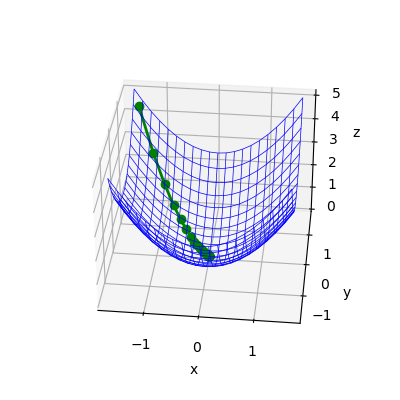

In [8]:
fig = plt.figure(figsize = (4,4))
ax3d = fig.add_subplot(projection='3d')
ax3d.plot_wireframe(xgrid,ygrid,zgrid, color = 'b', linewidth = 0.5)
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')
ax3d.plot(x1, y1, z1, '-ok', color = 'g', linewidth = 2)
plt.show()

<IPython.core.display.Javascript object>


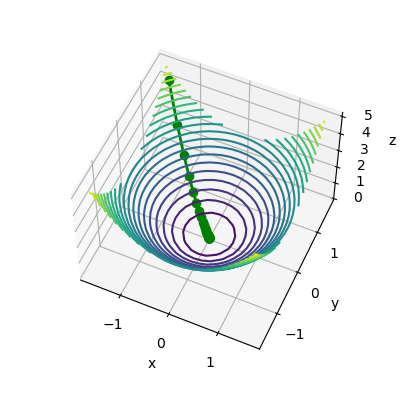

In [9]:
fig1 = plt.figure(figsize = (4,4))
ax3dlevel = fig1.add_subplot(projection='3d')
ax3dlevel.contour(xgrid, ygrid, zgrid, 20)
ax3dlevel.set_xlabel('x')
ax3dlevel.set_ylabel('y')
ax3dlevel.set_zlabel('z')
ax3dlevel.plot(x1, y1, z1, '-ok', color = 'g', linewidth = 2)
plt.show()

<IPython.core.display.Javascript object>


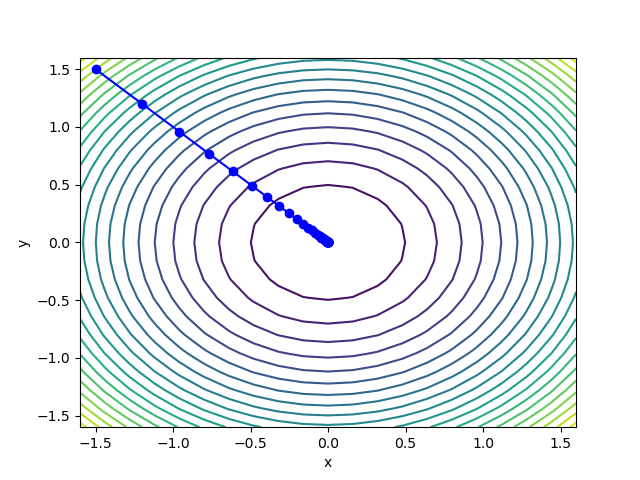

In [10]:
fig2, ax = plt.subplots()
ax.contour(xgrid, ygrid, zgrid, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(x1, y1, '-ok', color = 'b')
plt.show()